<a href="https://colab.research.google.com/github/Kwannn666/GAN_AI/blob/main/Q36134255_HW2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN(全連結)手寫辨識

## 1 . 初始設定

### 1.1 讀入標準套件

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 **層數**

原始設定神經元數量

In [ ]:
N1 = 20
N2 = 20
N3 = 20
N4 = 20

根據chatgpt的建議，原始設定的神經元數量太少，而從大到小的架構可以讓自己建立的神經網路先學習高維特徵接著再逐漸簡化到低維特徵進而有助提升準確度

In [ ]:
N1 = 128
N2 = 64
N3 = 32
N4 = 16

### 1.3 載入gradio套件

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.


### 1.4 讀入相關套件

In [ ]:
%matplotlib inline

# 標準數據分析、畫圖套件

from PIL import Image

# 神經網路方面

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix

# 互動設計用

from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio

import gradio as gr

## 2 . 讀入MNIST數據集

### 2.1 由 Keras 讀入 MNIST，並檢查資料的數量

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [ ]:
x_train.shape

(60000, 28, 28)

第1234筆資料

In [ ]:
x_train[1234]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 138, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7, 129, 252, 243,  65,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  33, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 112, 210, 252, 212,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 177,
        240, 249, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 240,  59,  41,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 245,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        149, 173, 253, 253, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  11, 179, 252, 195,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  67, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9, 153,  12,   0,   0,
          0,   0,  60, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   9, 144, 252, 129,   7,   0,
          0,   0, 164, 252, 199,  22,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 252, 252, 252,  59,   0,
        134, 134, 210, 252,  99,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  32, 210, 252, 241, 238,
        253, 252, 252, 252,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 112, 241, 252,
        253, 252, 222, 136,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 252,
        253, 216,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[1234]

3

### 2.2 格式整理

原使每筆數據是 28x28 的矩陣 (array), 這邊使 `reshape` 來調整為 8x28=784 長的向量。

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
x_train.shape

(60000, 784)

原始標籤是一個單一數字（0~9）,表示每張圖片的數字標記,接著使用 One-hot 編碼,轉換為One-hot 向量

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

## 3. 神經網路構建

函數為

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}^{10}$$

這邊使用了4個 dense 層

1.   第一層有 128 個神經元
2.   第二層有 64 個神經元
3.   第三層有 32 個神經元
4.   第四層有 16 個神經元

### 3.1 建構神經網路

透過利用 `Sequential`建立一個「序列型」的神經網路模型

In [ ]:
model = Sequential()

每次執行完訓練後可以透過 K.clear_session() 來清空上一次的訓練結果而不會重複影響進行結果干擾

In [ ]:
K.clear_session()

原始無特殊處理的 dense 層

In [ ]:
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(N4, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


根據網路上的資料顯示

*   透過使用 Dropout 來隨機捨棄神經元，進而避免模型過度依賴特定神經元，來增強泛化能力（generalization），但同時會使得模型在前期准確率較低，所以需要較多的epoch來進行訓練
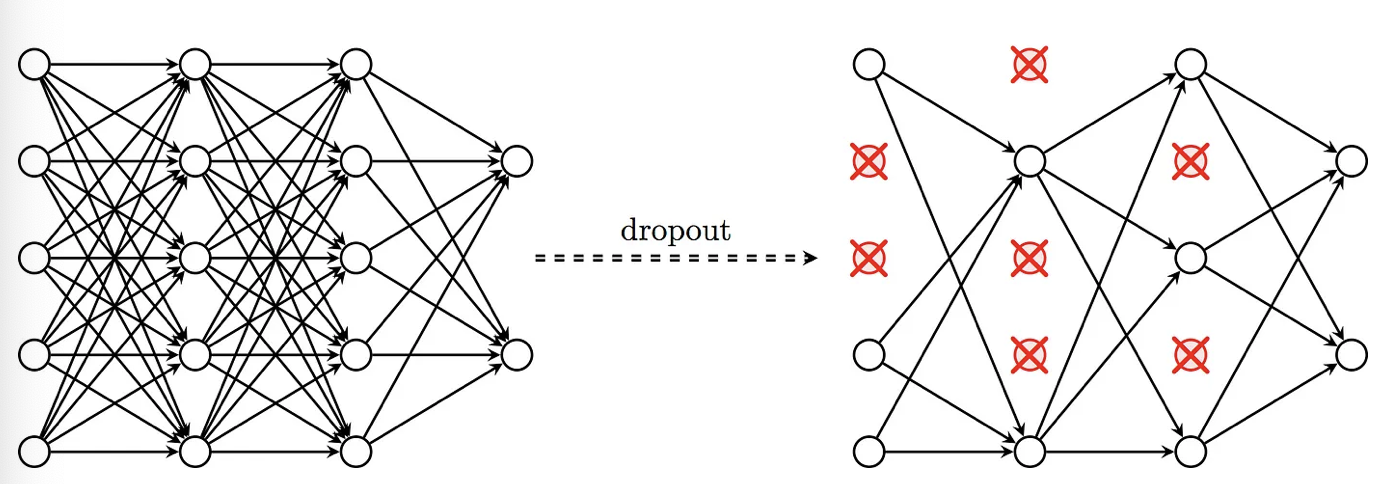
*   透過使用 Batch Normalization 來將每層輸出標準化，進而讓訓練更加穩定，但如果網路過於簡單可能反而會造成梯度調整過大，導致收斂速度變慢，造成模型的短期準確度反而降低，所以需要較複雜以及多的神經元來構建神經網路
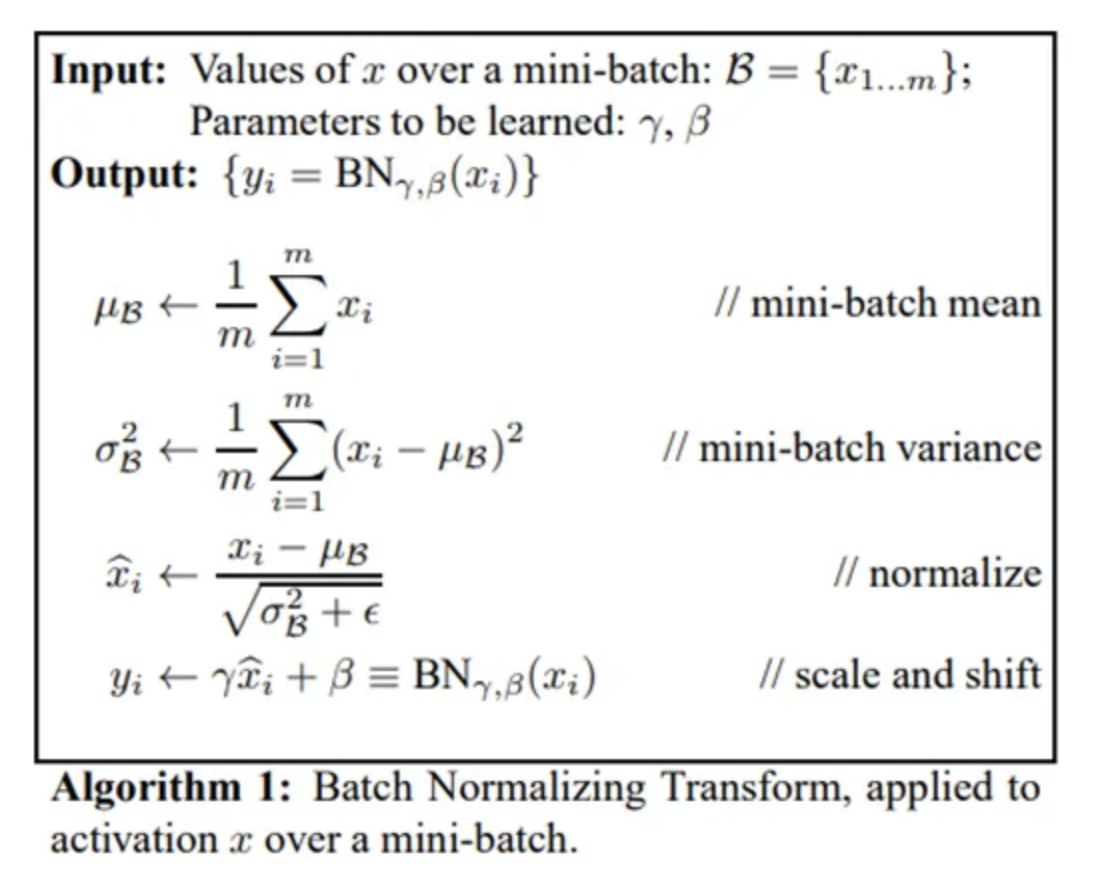



---

參考資料

https://zh.wikipedia.org/zh-tw/Dropout

https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/%E4%BD%BF%E7%94%A8-tensorflow-%E4%BA%86%E8%A7%A3-dropout-bf64a6785431

https://medium.com/ching-i/batch-normalization-%E4%BB%8B%E7%B4%B9-135a24928f12


在這邊我在每個 dense 層後皆加上 BatchNormalization 來進行批次標準化，並且透過 `Dropout(0.1)` 來讓每次訓練隨機停用 10% 的神經元，

不同激活函數的比較

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5636 - loss: 1.3829 - val_accuracy: 0.8865 - val_loss: 0.4525
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8492 - loss: 0.5697 - val_accuracy: 0.9281 - val_loss: 0.2760
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8932 - loss: 0.4042 - val_accuracy: 0.9406 - val_loss: 0.2122
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9114 - loss: 0.3301 - val_accuracy: 0.9471 - val_loss: 0.1814
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9240 - loss: 0.2828 - val_accuracy: 0.9513 - val_loss: 0.1623
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9314 - loss: 0.2486 - val_accuracy: 0.9572 - val_loss: 0.1445
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9372 - loss: 0.2298 - val_accuracy: 0.9601 - val_loss: 0.1348
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9406 - loss: 0.2094 - val_accuracy: 0.

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

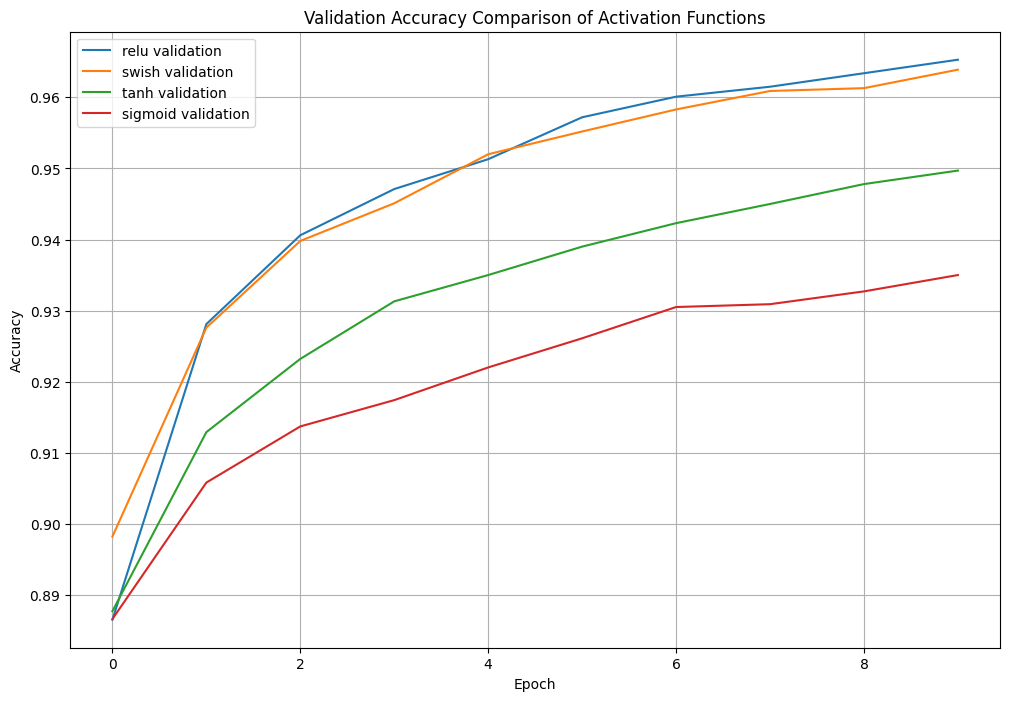

In [ ]:
activations = ['relu', 'swish', 'tanh', 'sigmoid']
histories = {}
for act in activations:
    model = Sequential()
    model.add(Dense(128, input_dim=784, activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(64, activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(32, activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(16, activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))
    histories[act] = history
    plt.figure(figsize=(12, 8))
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=f'{act} validation')
plt.title('Validation Accuracy Comparison of Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

在這邊可以觀察到在同樣的訓練過程以及設定中，激活函數 ReLU 的表現最好，所以我採用ReLU來做為此次作業的主要激活函數

In [ ]:
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(N2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(N3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(N4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


輸出層

In [ ]:
model.add(Dense(10, activation='softmax'))

這邊我使用相關模型參數分別為

1.   損失函數為 `categorical_crossentropy` 交叉熵

2.   優化器為 `optimizer=SGD(learning_rate=0.01)` 隨機梯度下降法，學習率為0.01

3.   評估指標為 `metrics=['accuracy']`

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

### 3.2 神經網路架構

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,474 (439.35 KB)

 Trainable params: 111,994 (437.48 KB)

 Non-trainable params: 480 (1.88 KB)

## 4. 訓練神經網路

* 這邊我們一次要訓練 100 筆資料 (`batch_size`) = 100
* 一共讓它訓練 100 次 (`epochs`) = 100

In [ ]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5415 - loss: 1.4778 - val_accuracy: 0.9025 - val_loss: 0.4193
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8616 - loss: 0.5410 - val_accuracy: 0.9300 - val_loss: 0.2597
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8989 - loss: 0.3741 - val_accuracy: 0.9423 - val_loss: 0.2036
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9166 - loss: 0.3050 - val_accuracy: 0.9499 - val_loss: 0.1732
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9273 - loss: 0.2648 - val_accuracy: 0.9554 - val_loss: 0.1517
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9346 - loss: 0.2405 - val_accuracy: 0.9571 - val_loss: 0.1407
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9402 - loss: 0.2204 - val_accuracy: 0.9606 - val_loss: 0.1305
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9445 - loss: 0.2008 - val_acc

## 5. 分析訓練成效 ( 以 ReLU 為例 )

在這邊我定義了 `show_train_history` 來作圖顯示 accuracy 與 loss 在 train 與 evaluation 的變化，而用來觀察模型的訓練過程以及觀察是否有 overfitting 過擬和的情況發生

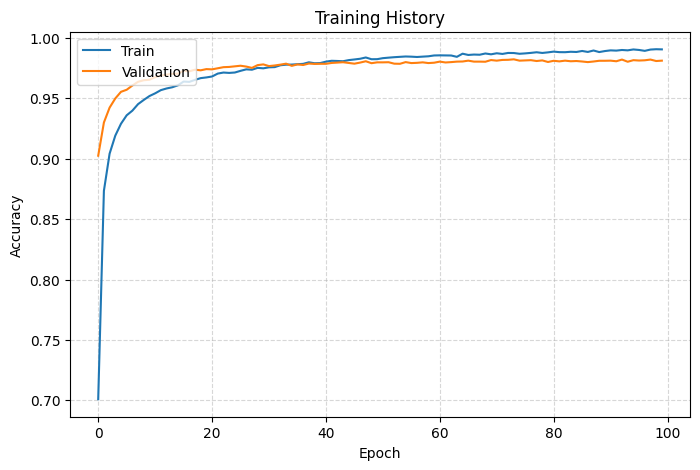

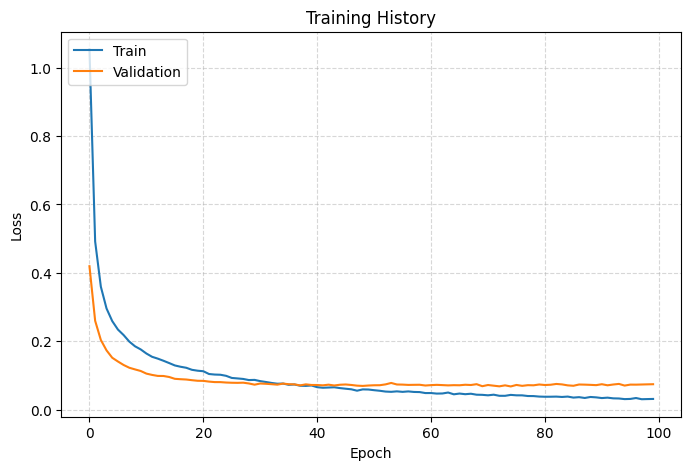

In [ ]:
def show_train_history(history, train, validation):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history[train], label='Train')
    plt.plot(history.history[validation], label='Validation')
    plt.title('Training History')
    plt.ylabel(train.capitalize())
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

根據圖我們可以觀察到


1.   Accuracy 曲線分析

  訓練集（ Train ）與驗證集（ Validation ）的準確率均隨著 epoch 增加而穩定提高，
  大約在第 10 個 epoch 之後，兩者都已超過 95% ，最終穩定在約 98.5% 左右，而
  兩條曲線彼此相當接近，表示模型沒有明顯過擬合的現象

2.   Loss 曲線分析

  訓練集與驗證集的損失函數隨著 epoch 增加持續下降，
  在差不多第 18 個 epoch 後，損失值已經接近穩定，並趨於非常低的數值（趨近於 < 0.1 ），而驗證集（ Validation ）的損失函數數值小於訓練集，表示泛化效果良好

使用測試資料 ( x_test , y_test ) 來評估訓練後的模型，並且使用 `np.argmax` 來取得這些機率中最大值的位置，也就是模型最終預測的類別，而將將每個樣本轉換成數字類別（0-9）

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
predict = np.argmax(model.predict(x_test), axis=-1)
predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9778 - loss: 0.0868
測試資料正確率 98.12%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


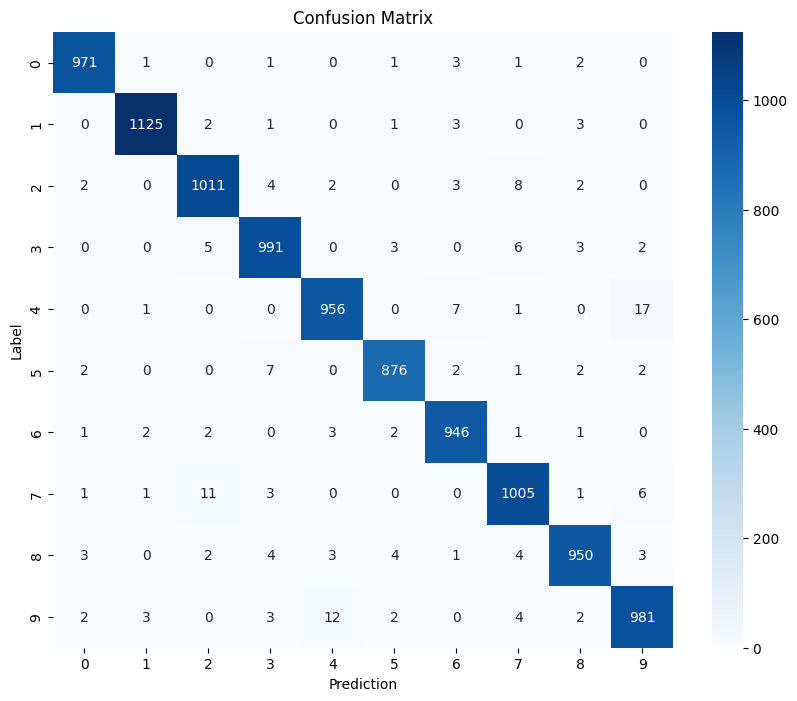

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

在這邊我額外使用混淆矩陣（ Confusion Matrix ）來分析分類的情形


1.   對角線（正確分類情形）
  
  深藍色區域代表預測正確的筆數，整體呈現明顯較高的數值 ，這顯示了
  大部分的數字類別預測準確度非常高（ 例如數字 1 的準確度幾乎完美 ）
2.   非對角線（錯誤分類情形）

  非對角線位置的數值表示錯誤分類的狀況，可以進一步觀察較明顯的錯誤分類


*   數字 4 容易被誤分類成 9 ：數字 4 有 11 筆錯誤分類成數字 17
*   數字 7 容易被誤分類成 2 ：數字 7 有 11 筆錯誤分類成數字 2
*   數字 9 容易與數字 4 及 7 混淆 ：在矩陣中顯示出現多次誤判情形

  而錯誤的原因可能因為手寫時字跡模糊或數字形狀相似

## 6. Gradio 結果展示

這邊主要使用教授在原始 GITHUB 上所寫的 Gradio 程式來產生額外網站來呈現以及使用編輯好的神經網路

In [ ]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [ ]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://955f14242e50f7aed3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://955f14242e50f7aed3.gradio.live
